<a href="https://colab.research.google.com/github/ceyxasm/anonymizer/blob/main/Face_blurring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [1]:
!pip install retina-face

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing libraries 

In [2]:
from retinaface import RetinaFace
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import requests
import os

## Data

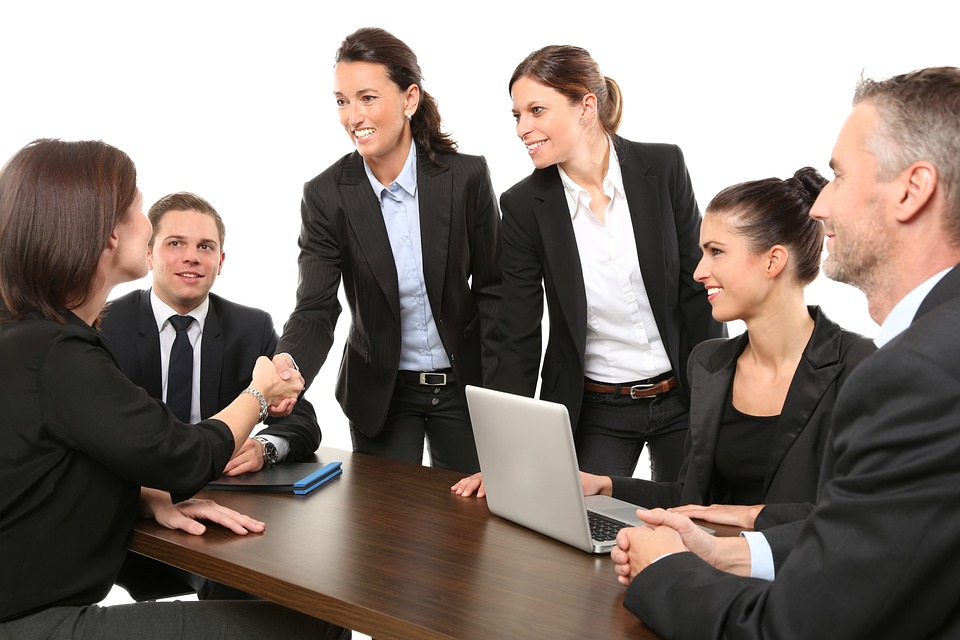

In [10]:
# show image
im = cv2.imread('/content/sample_data/sample_image/inage_1.jpg')
cv2_imshow(im)
# im = cv2.imread(f'{im_dir}/image_2.jpg')
# cv2_imshow(im)

## Detect faces

In [12]:
result = RetinaFace.detect_faces(f'/content/sample_data/sample_image/inage_1.jpg')

Directory  /root /.deepface created
Directory  /root /.deepface/weights created
retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:02<00:00, 50.1MB/s]


In [13]:
result

{'face_1': {'score': 0.9997296333312988,
  'facial_area': [509, 77, 575, 168],
  'landmarks': {'right_eye': [516.02686, 118.236015],
   'left_eye': [535.33844, 110.37671],
   'nose': [516.8711, 132.64568],
   'mouth_right': [527.998, 147.17911],
   'mouth_left': [545.5963, 139.4704]}},
 'face_2': {'score': 0.9996568560600281,
  'facial_area': [334, 62, 401, 156],
  'landmarks': {'right_eye': [343.9706, 101.968704],
   'left_eye': [368.3517, 99.378136],
   'nose': [350.54263, 121.40493],
   'mouth_right': [353.8579, 132.91934],
   'mouth_left': [375.14832, 129.75017]}},
 'face_3': {'score': 0.9996404051780701,
  'facial_area': [152, 210, 220, 299],
  'landmarks': {'right_eye': [175.67867, 243.95851],
   'left_eye': [206.64192, 246.40771],
   'nose': [192.61755, 258.79767],
   'mouth_right': [175.35056, 274.29663],
   'mouth_left': [202.39249, 276.1998]}},
 'face_4': {'score': 0.9995312690734863,
  'facial_area': [693, 209, 764, 320],
  'landmarks': {'right_eye': [703.4372, 252.7867],
  

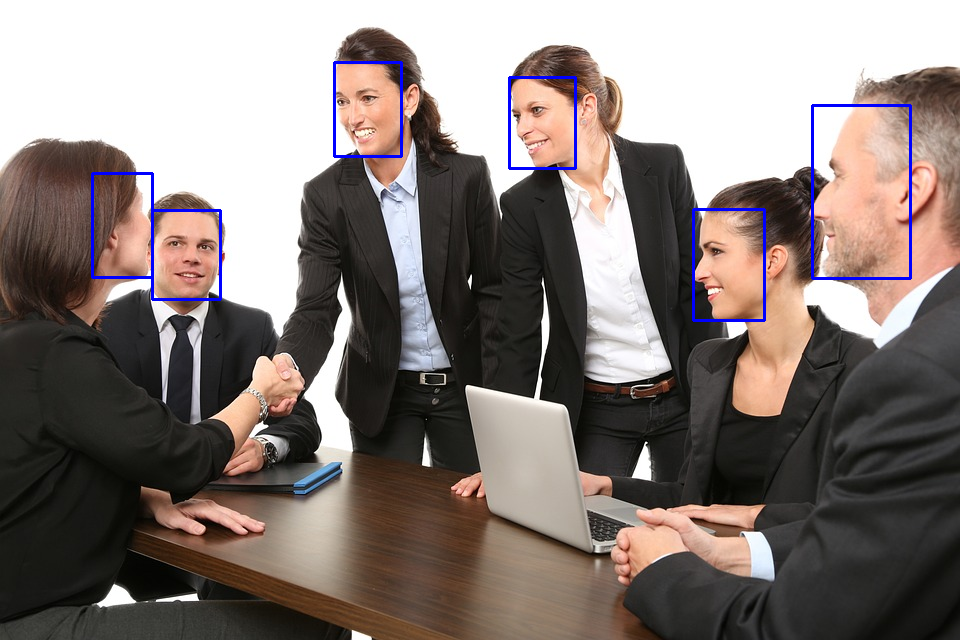

In [17]:
color = (255,0,0) #BGR
for k, v in result.items():
  start_coord = tuple(v['facial_area'][0:2])
  end_coord = tuple(v['facial_area'][2:4])
  im_output = cv2.rectangle(im, start_coord, end_coord, color = color, thickness = 2)
cv2_imshow(im_output)

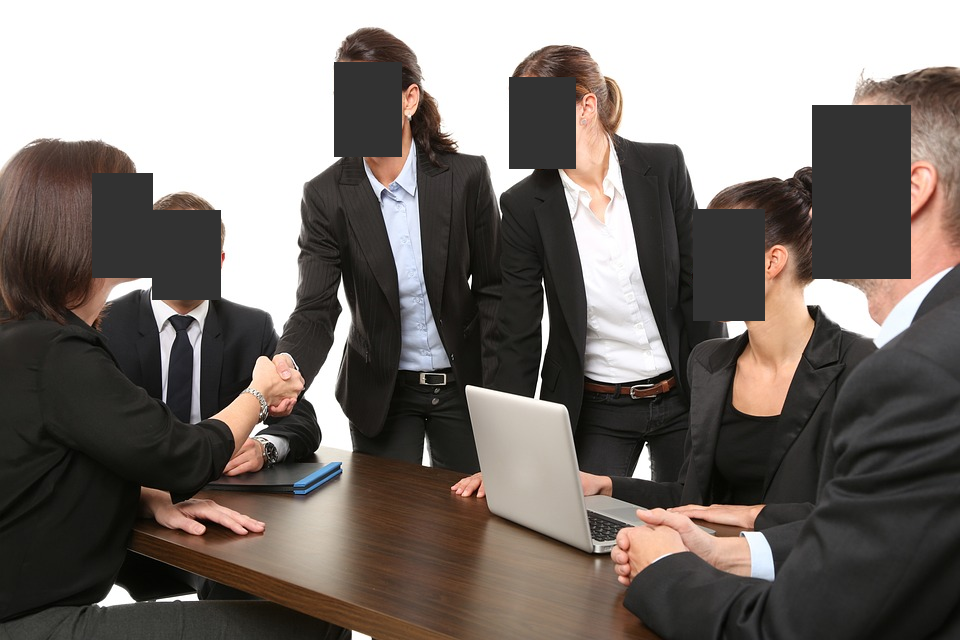

In [19]:
p1 = '/content/sample_data/sample_image/inage_1.jpg'
im = cv2.imread(p1)
result = RetinaFace.detect_faces(p1)
color = (50,50,50) #BGR

for k, v in result.items():
    start_coord = tuple(v['facial_area'][0:2])
    end_coord = tuple(v['facial_area'][2:4])
    im_output = cv2.rectangle(im, start_coord, end_coord, color = color, thickness = -1)
cv2_imshow(im_output)

* Now we can employ other techniques such as pixelation or gaussian blur.

* Please also note, While deep learning and computer vision can help to automate the process of face blurring, even the best deep learning model is not able to detect accurately faces 100% of the time. Below is an image with noisy background and many faces to detect. There are 26 faces in the foreground of the image, but only 25 of them are detected and anonymized


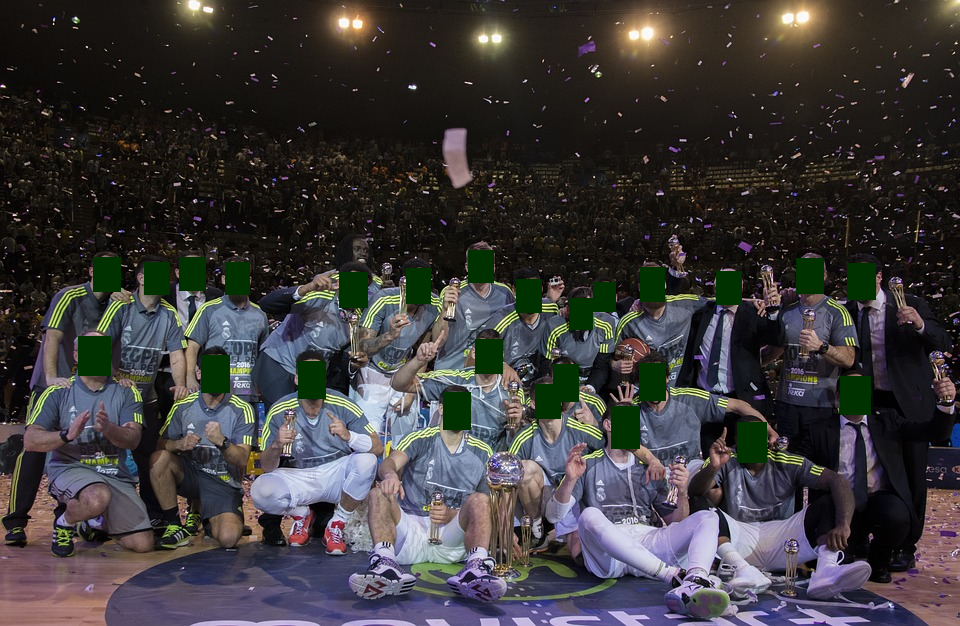

In [22]:
p2 = '/content/sample_data/sample_image/image_2.jpg'
im = cv2.imread(p2)
result = RetinaFace.detect_faces(p2)
color = (0,50,0) #BGR

for k, v in result.items():
    start_coord = tuple(v['facial_area'][0:2])
    end_coord = tuple(v['facial_area'][2:4])
    im_output = cv2.rectangle(im, start_coord, end_coord, color = color, thickness = -1)
cv2_imshow(im_output)

Clearly there is a bias in the model.
We plan to remove this bais in the models and propose a more robust architecture that can be scaled to videos in real-time.